# Calidad de los datos para tabla Players

## 0. Librerias

In [446]:
import sqlite3
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Extraccion de los datos

In [447]:
tabla = 'Match'

In [448]:
conn = sqlite3.connect('database.sqlite')
data = pd.read_sql_query(f"SELECT * FROM {tabla}", conn)

In [449]:
data.shape

(25979, 115)

In [450]:
data.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [451]:
data.dtypes

id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

## 1.1. Columnas numericas 

In [452]:
#number_cols = data.dtypes[(data.dtypes == np.int64) | (data.dtypes == np.float64)].index
integer_cols = data.select_dtypes(include = ['int']).columns
float_cols = data.select_dtypes(include = ['float']).columns

number_cols = data.select_dtypes(include = ['int','float']).columns
number_cols 

Index(['id', 'country_id', 'league_id', 'stage', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'home_player_X1',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=105)

In [453]:
data[number_cols].describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


## 1.2. Columnas categoricas 

In [454]:
#non_number_cols = data.columns.difference(number_cols) 
#non_number_cols = data.dtypes[(data.dtypes != np.int64) & (data.dtypes != np.float64)].index 

object_cols = data.select_dtypes(include = ['object']).columns
boolean_cols = data.select_dtypes(include = ['bool']).columns
date_cols = data.select_dtypes(include = ['datetime64']).columns

non_number_cols = data.select_dtypes(include = ['object','bool','datetime64']).columns
non_number_cols

Index(['season', 'date', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession'],
      dtype='object')

In [455]:
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors = 'coerce')
    data[date_cols].head(3)

In [456]:
from pandas.api.types import (
    is_object_dtype,
    is_bool_dtype,
    is_datetime64_any_dtype
)

object_cols  = [c for c in data.columns if is_object_dtype(data[c])]                 # Solo object
boolean_cols = [c for c in data.columns if is_bool_dtype(data[c])]                   # Solo bool
date_cols    = [c for c in data.columns if is_datetime64_any_dtype(data[c])] 

non_number_cols = data.select_dtypes(include = ['object','bool','datetime64']).columns
non_number_cols

Index(['season', 'date', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession'],
      dtype='object')

In [457]:
data["date"] = pd.to_datetime(data["date"], errors = 'coerce')

data["date"].head()

0   2008-08-17
1   2008-08-16
2   2008-08-16
3   2008-08-17
4   2008-08-16
Name: date, dtype: datetime64[ns]

In [458]:
data[non_number_cols].head()

,season,date,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,2008/2009,2008-08-17,None,None,None,None,None,None,None,None
1,2008/2009,2008-08-16,None,None,None,None,None,None,None,None
2,2008/2009,2008-08-16,None,None,None,None,None,None,None,None
3,2008/2009,2008-08-17,None,None,None,None,None,None,None,None
4,2008/2009,2008-08-16,None,None,None,None,None,None,None,None


## 1.3 Correlacion

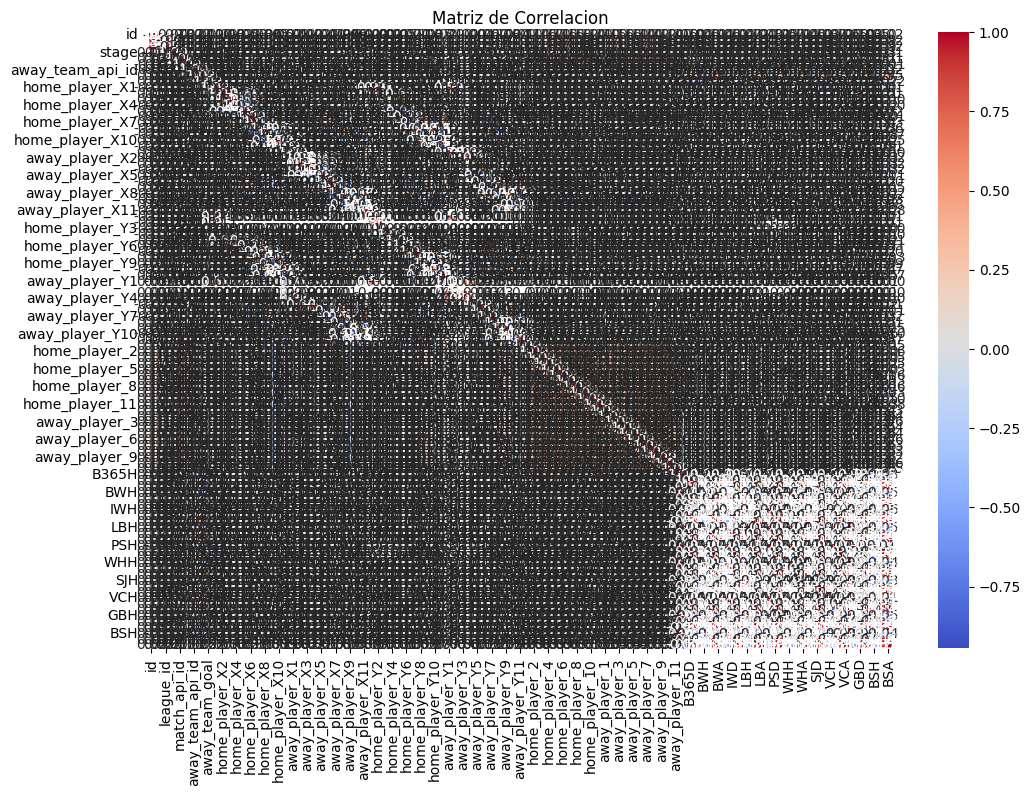

In [459]:
import numpy as np

matriz_correlaciones = data[number_cols].corr()

mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, mask=None, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlacion")
plt.show()

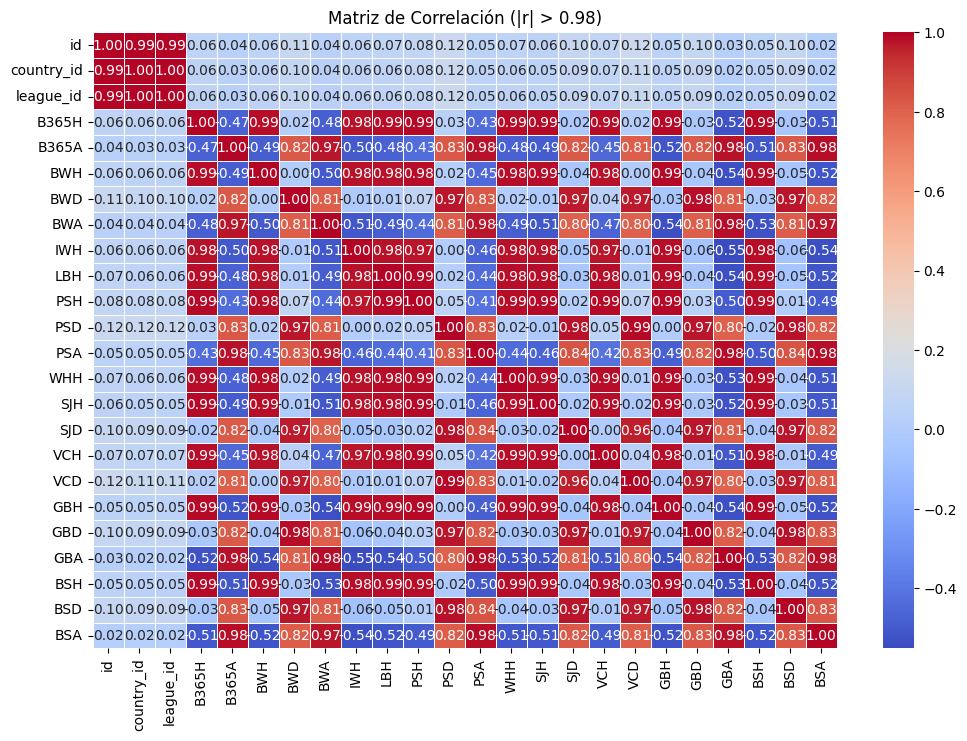

In [460]:
# Seleccionar pares con correlación fuerte (mayor a 0.8 y menor a 1 para evitar la diagonal)
umbral = 0.98
mask_fuerte = (matriz_correlaciones.abs() > umbral) & (matriz_correlaciones.abs() < 1)

# Variables que cumplen la condición
vars_fuerte = mask_fuerte.any(axis=1)
vars_seleccionadas = matriz_correlaciones.columns[vars_fuerte]

matriz_filtrada = matriz_correlaciones.loc[vars_seleccionadas, vars_seleccionadas]

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_filtrada, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title(f"Matriz de Correlación (|r| > {umbral})")
plt.show()


In [461]:
data.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [462]:
corr_pairs = (
    matriz_correlaciones.where(np.triu(np.ones(matriz_correlaciones.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Variable_1", "Variable_2", "Correlación"]

# Filtrar por el umbral
corr_filtradas = corr_pairs[corr_pairs["Correlación"] > umbral].sort_values(by="Correlación", ascending=False)

corr_filtradas

,Variable_1,Variable_2,Correlación
103,country_id,league_id,1.000000
0,id,country_id,0.994503
1,id,league_id,0.994503
5146,PSH,VCH,0.993593
4960,BWH,GBH,0.992561
5163,PSD,VCD,0.990293
4867,B365H,PSH,0.989639
4879,B365H,GBH,0.989234
4873,B365H,SJH,0.989212
5083,LBH,PSH,0.989182


# 2. Calidad de los datos

In [463]:
data_t = data.copy()
data_t.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


## 2.1. Completitud

In [464]:
data_t.isnull().sum().sort_values(ascending=False).head(10)

PSD     14811
PSA     14811
PSH     14811
BSH     11818
BSA     11818
BSD     11818
GBD     11817
GBH     11817
GBA     11817
card    11762
dtype: int64

In [465]:
print("Porcentage nulos por columna: ")
(100* data_t.isnull().sum()/data_t.shape[0]).sort_values(ascending=False).head(99)

Porcentage nulos por columna: 


PSD              57.011432
PSA              57.011432
PSH              57.011432
BSH              45.490589
BSA              45.490589
                   ...    
away_player_6     5.054082
home_player_8     5.038685
away_player_3     4.977097
home_player_3     4.930906
away_player_2     4.919358
Length: 99, dtype: float64

In [466]:
"""
import pandas as pd
from IPython.display import display

# Serie de % nulos (en porcentaje y ordenada)
pct_nulls = (100 * data_t.isnull().sum() / len(data_t)).sort_values(ascending=False).round(2)

# Pasarlo a DataFrame para verlo mejor
df_nulls = pct_nulls.rename("pct_nulos").reset_index().rename(columns={"index": "columna"})

# Mostrar sin truncar (solo en esta celda)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_nulls)
"""


'\nimport pandas as pd\nfrom IPython.display import display\n\n# Serie de % nulos (en porcentaje y ordenada)\npct_nulls = (100 * data_t.isnull().sum() / len(data_t)).sort_values(ascending=False).round(2)\n\n# Pasarlo a DataFrame para verlo mejor\ndf_nulls = pct_nulls.rename("pct_nulos").reset_index().rename(columns={"index": "columna"})\n\n# Mostrar sin truncar (solo en esta celda)\nwith pd.option_context(\'display.max_rows\', None, \'display.max_columns\', None):\n    display(df_nulls)\n'

In [467]:
print("Numero de reguistros por cada proporcion de nulos:")
(data_t.isnull().sum(axis=1) / data_t.shape[1]).value_counts().head()



Numero de reguistros por cada proporcion de nulos:


0.026087    5685
0.078261    3857
0.095652    3480
0.052174    1966
0.000000    1762
Name: count, dtype: int64

In [468]:
num_filas_con_nulos = data_t.isnull().any(axis=1).sum()
print(f"Número de registros con al menos un nulo: {num_filas_con_nulos}")


Número de registros con al menos un nulo: 24217


In [469]:
porcentaje_filas_con_nulos = (data_t.isnull().any(axis=1).sum()/data_t.shape[0]) * 100
print(f"Porcentaje de registros con al menos un nulo: {porcentaje_filas_con_nulos:.2f}%")

Porcentaje de registros con al menos un nulo: 93.22%


In [470]:
cols_con_nulos = data_t.columns[data_t.isnull().any()]
print(cols_con_nulos)
print({f"Columnas en total: {data_t.shape[1]}"})
print({f"Columnas con nulos: {cols_con_nulos.shape[0]}"})


Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=104)
{'Columnas en total: 115'}
{'Columnas con nulos: 104'}


In [471]:
data_t = data_t.dropna()

In [472]:
for col in number_cols:
    data_t[col].fillna(data_t[col].mean())

In [473]:
data_t.isnull().sum().sort_values(ascending=False).head()

id            0
country_id    0
league_id     0
season        0
stage         0
dtype: int64

## 2.2. Unicidad

In [474]:
for col in non_number_cols:
    num_duplicated = data_t.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

season: 1761
date: 1590
goal: 132
shoton: 1383
shotoff: 1383
foulcommit: 1383
card: 48
cross: 1383
corner: 1383
possession: 1383


In [475]:
data_t.duplicated(keep=False).sum()

np.int64(0)

In [476]:
data_t.loc[data_t.duplicated(keep=False)]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA


In [477]:
cols = [c for c in data_t.columns if c != "id"]
dup_mask = data_t.duplicated(subset=cols, keep=False)
duplicados = data_t[dup_mask].sort_values(by=cols)
duplicados


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA


In [478]:
for col in number_cols:
    num_duplicated = data_t.duplicated(subset = [col]).sum()
    print(f"Valores duplicados para la columna {col}: {num_duplicated}")

Valores duplicados para la columna id: 0
Valores duplicados para la columna country_id: 1757
Valores duplicados para la columna league_id: 1757
Valores duplicados para la columna stage: 1724
Valores duplicados para la columna match_api_id: 0
Valores duplicados para la columna home_team_api_id: 1664
Valores duplicados para la columna away_team_api_id: 1664
Valores duplicados para la columna home_team_goal: 1752
Valores duplicados para la columna away_team_goal: 1755
Valores duplicados para la columna home_player_X1: 1761
Valores duplicados para la columna home_player_X2: 1757
Valores duplicados para la columna home_player_X3: 1755
Valores duplicados para la columna home_player_X4: 1756
Valores duplicados para la columna home_player_X5: 1755
Valores duplicados para la columna home_player_X6: 1754
Valores duplicados para la columna home_player_X7: 1755
Valores duplicados para la columna home_player_X8: 1754
Valores duplicados para la columna home_player_X9: 1754
Valores duplicados para la

In [479]:
print(f"Porcentage de duplicados: {data_t.duplicated(keep=False).sum() / data.shape[0] * 100:.2f}%")

Porcentage de duplicados: 0.00%


In [480]:
data_t.drop_duplicates(keep = 'first', inplace = True)

In [481]:
data_t.duplicated(keep=False).sum()

np.int64(0)

## 2.3. Consistencia

In [482]:
object_cols

['season',
 'date',
 'goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession']

In [483]:
data_t[non_number_cols]

,season,date,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
3248,2012/2013,2012-08-18,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>52</comment><event...
3249,2012/2013,2012-08-20,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>32</comment><event...
3250,2012/2013,2012-08-18,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>58</comment><event...
3251,2012/2013,2012-08-19,<goal><value><comment>npm</comment><event_inci...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>58</comment><event...
3252,2012/2013,2012-08-18,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...
...,...,...,...,...,...,...,...,...,...,...
23412,2012/2013,2012-10-28,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
23413,2012/2013,2012-10-28,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
23414,2012/2013,2012-10-28,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
23415,2012/2013,2012-10-27,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />


In [484]:
for col in object_cols:
    print(f"Value counts for column: {col}")
    print(data_t.value_counts(col))
    print("\n")

Value counts for column: season
season
2012/2013    1762
Name: count, dtype: int64


Value counts for column: date
date
2013-03-30    34
2012-12-22    27
2013-02-09    27
2012-10-20    26
2012-11-17    26
              ..
2013-02-26     1
2013-02-18     1
2013-04-16     1
2013-05-13     1
2013-05-20     1
Name: count, Length: 172, dtype: int64


Value counts for column: goal
goal
<goal />                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [485]:
data_t.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
3248,3249,1729,1729,2012/2013,1,2012-08-18,1228229,9825,8472,0,...,9.50,1.44,4.75,8.50,1.35,4.60,9.00,1.40,4.33,8.50
3249,3250,1729,1729,2012/2013,1,2012-08-20,1228230,8668,10260,1,...,1.91,4.30,3.70,1.87,4.60,3.50,1.83,4.00,3.40,1.91
3250,3251,1729,1729,2012/2013,1,2012-08-18,1228231,9879,9850,5,...,4.50,1.83,3.75,4.75,1.80,3.50,4.40,1.83,3.50,4.33
3251,3252,1729,1729,2012/2013,1,2012-08-19,1228232,8456,8466,3,...,19.00,1.20,7.00,19.00,1.18,6.25,16.00,1.17,6.50,17.00
3252,3253,1729,1729,2012/2013,1,2012-08-18,1228233,10261,8586,2,...,2.80,2.62,3.40,2.75,2.60,3.30,2.75,2.50,3.40,2.70


## 2.4. Validez

In [486]:
data.dtypes

id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

In [487]:
for col in object_cols:
    print(f"Value counts for column: {col}")
    print(data_t.value_counts(col))
    print("\n")

Value counts for column: season
season
2012/2013    1762
Name: count, dtype: int64


Value counts for column: date
date
2013-03-30    34
2012-12-22    27
2013-02-09    27
2012-10-20    26
2012-11-17    26
              ..
2013-02-26     1
2013-02-18     1
2013-04-16     1
2013-05-13     1
2013-05-20     1
Name: count, Length: 172, dtype: int64


Value counts for column: goal
goal
<goal />                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 